In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"]=18,18
from DataPreprocessing import DataProcessingClass
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)


In [2]:
df = pd.read_csv('data/train.tsv', sep='\t')
df.head(3)

,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,Keywords,cast,crew
0,/7IBpOrw0ATwL1AOV97mtsceDpYs.jpg,"{'id': 556, 'name': 'Spider-Man Collection', '...",258000000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",https://www.sonypictures.com/movies/spiderman3,559,tt0413300,en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,22.024,/2N9lhZg6VtVJoGCZDjXVC3a81Ea.jpg,"[{'id': 19551, 'logo_path': '/2WpWp9b108hizjHK...","[{'iso_3166_1': 'US', 'name': 'United States o...",2007-05-01,890871626,139.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The battle within.,Spider-Man 3,False,6.2,8180,"[{'id': 697, 'name': 'loss of loved one'}, {'i...","[{'cast_id': 30, 'character': 'Peter Parker / ...","[{'credit_id': '52fe4252c3a36847f80151a5', 'de..."
1,/lYeE7k0OR3HXyoq7FeswyaxFJvL.jpg,"{'id': 256296, 'name': 'Silent Night, Deadly N...",250000,"[{'id': 35, 'name': 'Comedy'}, {'id': 27, 'nam...",NaN,50719,tt0093974,en,"Silent Night, Deadly Night Part 2",After being traumatized by his brother Billy's...,4.756,/64ATtm2eMd0yfrTJsHANQ0NmMSn.jpg,"[{'id': 18924, 'logo_path': None, 'name': 'Sil...","[{'iso_3166_1': 'US', 'name': 'United States o...",1987-04-10,154323,88.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The nightmare is about to begin ... AGAIN!,"Silent Night, Deadly Night Part 2",False,4.3,68,"[{'id': 65, 'name': 'holiday'}, {'id': 1991, '...","[{'cast_id': 1000, 'character': 'Ricky Caldwel...","[{'credit_id': '52fe47d4c3a36847f814a70f', 'de..."
2,/gVXLIfMR2hLmkn0nACctlMCJBfx.jpg,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",https://www.scottymovie.com/,469062,tt2773246,en,Scotty and the Secret History of Hollywood,A deliciously scandalous portrait of unsung Ho...,4.746,/2uXDNXBoIrRBbfpVrvegoLr8OVt.jpg,"[{'id': 88564, 'logo_path': '/pn3p12IC4Tb0K8re...","[{'iso_3166_1': 'US', 'name': 'United States o...",2018-07-27,176236,98.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Scotty and the Secret History of Hollywood,False,6.5,15,"[{'id': 158718, 'name': 'lgbt'}]","[{'cast_id': 1, 'character': 'Himself', 'credi...","[{'credit_id': '5980e931c3a3680cfb002d0e', 'de..."


In [3]:
dp = DataProcessingClass(df)
dp.data.head()

,budget,id,popularity,revenue,runtime,title,vote_average,vote_count,genresIDs,prodCompIDs,collectionID,isInCollection,year,month,castIDs,director,directorID,directorCat,popularKeywordsIDs,profitableKeywordsIDs
0,258000000,559,22.024,890871626,139.0,Spider-Man 3,6.2,8180,"[14, 28, 12]","[19551, 5, 326, 34]",556,True,2007,5,"[5293, 18999, 17051]",Sam Raimi,7623,9,"[9663, 9748, 697, 9717, 9715, 2038, 1453, 851,...","[5776, 5789, 5857, 255116, 1965, 9715, 9717, 8..."
1,250000,50719,4.756,154323,88.0,"Silent Night, Deadly Night Part 2",4.3,68,"[35, 27]",[18924],256296,True,1987,4,"[97619, 98078, 46930]",Lee Harry,213404,0,"[9826, 9663, 10714, 207317, 65, 11181, 1991, 1...","[9663, 1991, 207317, 65, 9826, 10714, 11181, 1..."
2,0,469062,4.746,176236,98.0,Scotty and the Secret History of Hollywood,6.5,15,[99],[88564],-1,False,2018,7,[11275],Matt Tyrnauer,1116251,0,[158718],[158718]
3,1000000,9003,13.828,14564027,94.0,Hellraiser,6.9,1115,[27],"[1950, 15338, 15339, 15340]",8917,True,1987,9,"[40043, 14782, 45588]",Clive Barker,31211,9,"[9748, 34117, 6152, 3182, 15001, 1449, 10327, ...","[6152, 15001, 1449, 9748, 155619, 3182, 10864,..."
4,15000000,11153,15.070,61399552,99.0,National Lampoon's Vacation,7.1,782,"[35, 12]",[174],108693,True,1983,7,"[4942, 26510, 1811]",Harold Ramis,1524,9,"[179431, 7312, 33694, 14724, 158340]","[158340, 179431, 14724, 33694, 10673, 7312, 5493]"


In [4]:
data = dp.data

# Plans:
1) Graphs:
    Genre/revenue /Done
    Director/revenue (Create Director categories) 
    Production company / revenue (Create prod Company categories)
    PopulatKeywords /revenue (Create PopulatKeywords categories)
    ProfitableKeywords /revenue (Create ProfitableKeywords categories)
    Year / revenue
2) Matrix plot

# Year

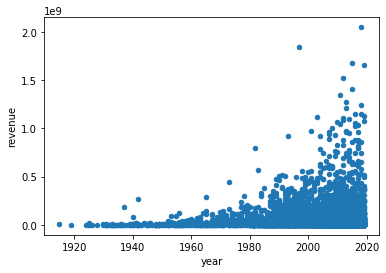

In [5]:
data.plot.scatter(x = 'year', y = 'revenue')   

# Genres

In [6]:
# geners_rev_df generation
geners_rev_df = pd.DataFrame(columns = ['genre', 'revenue'])
for index, row in data[['genresIDs','revenue']].iterrows():
    for gid in row['genresIDs']:
        geners_rev_df = geners_rev_df.append({'genre': dp.genres_dict[gid], 'revenue':row['revenue']},ignore_index=True)
geners_rev_df['revenue'] =  pd.to_numeric(geners_rev_df['revenue'])
print(geners_rev_df.head())
# mean_rev = dp.profitFromField('genresIDs')
# dp.genres_dict

       genre    revenue
0    Fantasy  890871626
1     Action  890871626
2  Adventure  890871626
3     Comedy     154323
4     Horror     154323


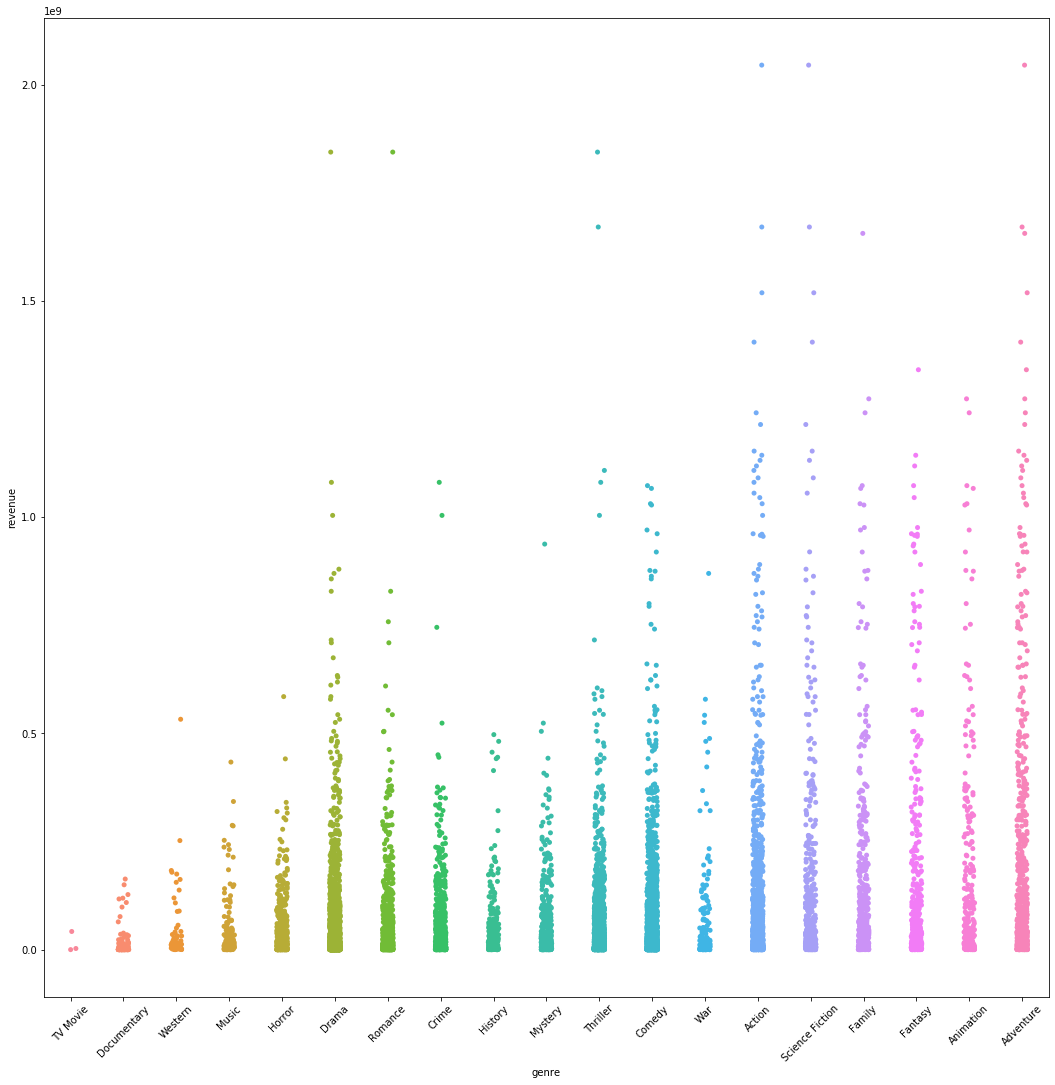

In [12]:
order = ['TV Movie', 'Documentary', 'Western', 'Music', 'Horror', 'Drama', 'Romance',
 'Crime', 'History', 'Mystery', 'Thriller', 'Comedy', 'War', 'Action',
 'Science Fiction', 'Family', 'Fantasy', 'Animation', 'Adventure']
PLT = sns.stripplot(x="genre", y="revenue", data=geners_rev_df, order=order)
PLT.set_xticklabels(PLT.get_xticklabels(), rotation=45)
PLT

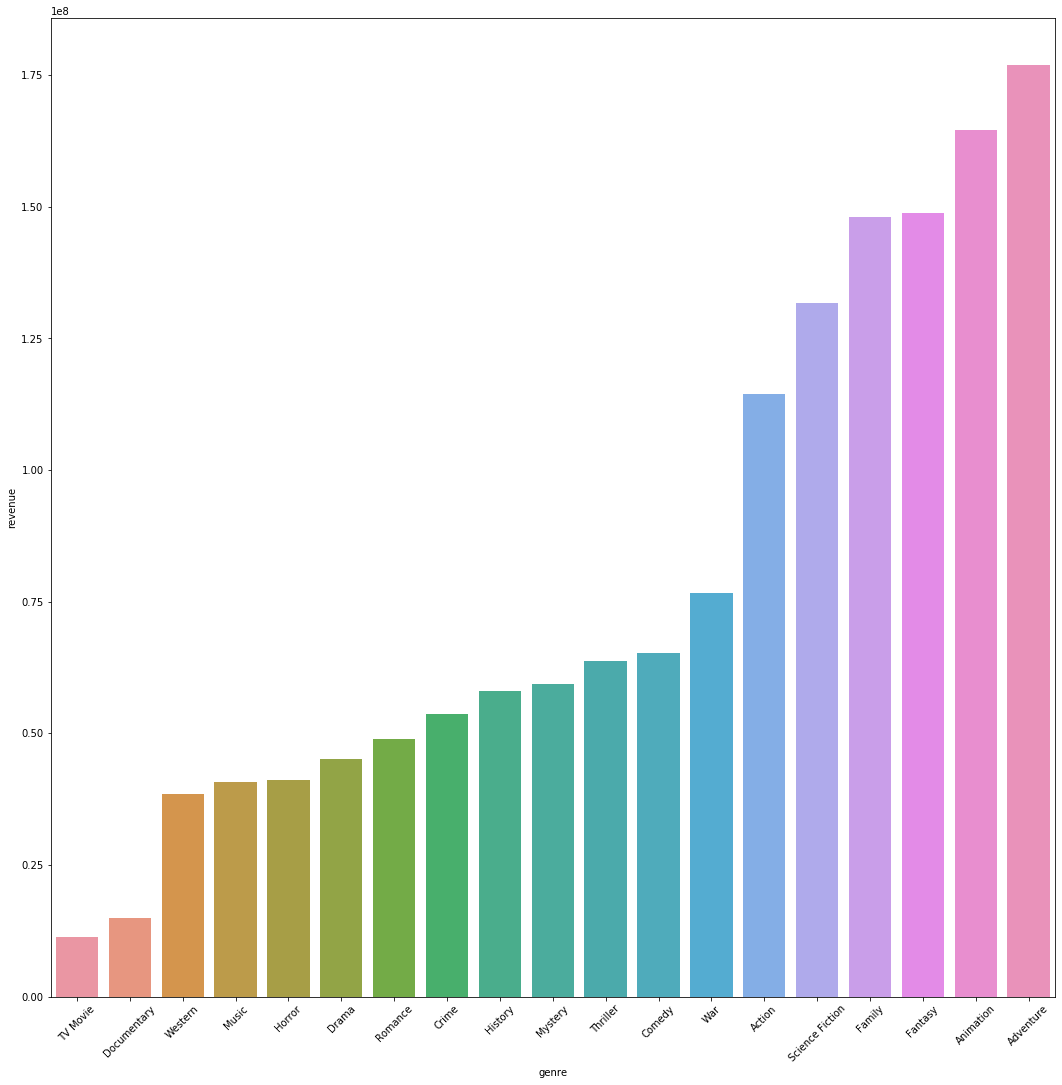

In [13]:
# By mean revenue:
ploted_data = geners_rev_df.groupby('genre').mean().reset_index().sort_values('revenue')
# print(ploted_data['genre'].values)
PLT2 = sns.barplot(x="genre", y="revenue", data= ploted_data)
PLT2.set_xticklabels(PLT.get_xticklabels(), rotation=45)
PLT2

# Corellation plots:

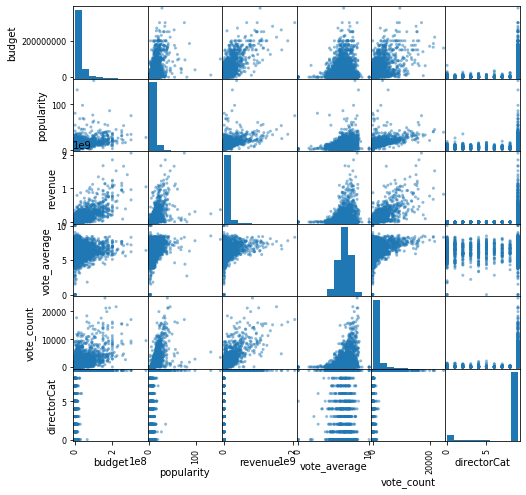

In [19]:
numerical_df = data[['budget', 'popularity', 'revenue', 'vote_average', 'vote_count', 'directorCat']]
pd.plotting.scatter_matrix(numerical_df, figsize=(8, 8))
plt.show()

In [20]:
numerical_df.corr()

,budget,popularity,revenue,vote_average,vote_count,directorCat
budget,1.000000,0.504736,0.752630,0.014701,0.605097,0.230400
popularity,0.504736,1.000000,0.566171,0.233136,0.631915,0.226140
revenue,0.752630,0.566171,1.000000,0.159052,0.768786,0.193341
vote_average,0.014701,0.233136,0.159052,1.000000,0.288702,0.075240
vote_count,0.605097,0.631915,0.768786,0.288702,1.000000,0.185550
directorCat,0.230400,0.226140,0.193341,0.075240,0.185550,1.000000
